In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

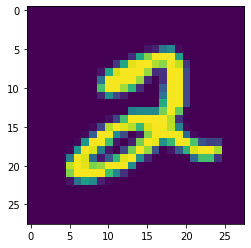

In [4]:
plt.imshow(X_train[5])

In [5]:
only_zeros = X_train[y_train == 0]

In [6]:
only_zeros.shape

(5923, 28, 28)

In [7]:
28*28

784

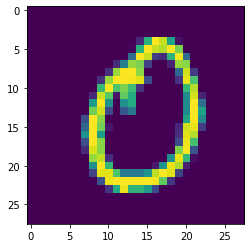

In [8]:
plt.imshow(only_zeros[15])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten

In [10]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28, 28]))
discriminator.add(Dense(200, activation='relu'))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [11]:
size =100
generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[size]))
generator.add(Dense(200, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28, 28]))

In [12]:
GAN = Sequential([generator, discriminator])
discriminator.trainable = False
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [13]:
import tensorflow as tf

In [14]:
batch_size = 32
my_data = only_zeros
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [15]:
epochs=1


In [20]:
generator, discrimantor = GAN.layers

In [21]:
for epoch in range(epochs):
    i=0
    for x_batch in dataset:
        i+=1
        if i%100==0:
            print(f'{i} batch')
        noise = tf.random.normal([batch_size,size])
        gen_images = generator(noise)
        X_fake_real = tf.concat([gen_images, tf.dtypes.cast(x_batch, tf.float32)], axis=0)
        y1 = tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
        discrimantor.trainable = True
        discrimantor.train_on_batch(X_fake_real, y1)
        noise = tf.random.normal(shape=[batch_size, size])
        y2 = tf.constant([[1.0]]*batch_size)
        discrimantor.trainable = False
        GAN.train_on_batch(noise, y2)

100 batch


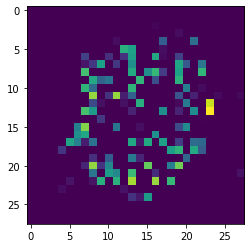

In [23]:
noise = tf.random.normal(shape=[10, size])
images = generator(noise)
plt.imshow(images[5])